## Google Play Store Apps Rating Predictor Machine Learning Model

## Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Read and Explore Dataset

In [2]:
dataset = pd.read_csv('googleplaystore.csv')
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
dataset.shape

(10841, 13)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning

In [5]:
dataset[dataset['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
dataset.drop([10472], inplace=True)
dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [7]:
dataset['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [8]:
dataset['Content Rating'] = dataset['Content Rating'].apply(lambda x: x if x != 'Unrated' else 'Everyone')

### Converting Size from MB to KB 

In [9]:
def sizer(x):
    x = x.replace(",","")
    val = x[-1]
    if len(x) > 6:
        return None
    if val == 'M':
        return float(x[:-1])*1000
    else:
        return float(x[:-1])

In [10]:
dataset['Size'] = dataset['Size'].apply(sizer)

In [11]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
def mega_to_numeric(x):
    if not x.isdigit():
        return int(x[:-3])*1000000
    return int(x)

In [13]:
dataset['Reviews'] = dataset['Reviews'].apply(mega_to_numeric)

In [14]:
dataset['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

### Filling the missing values with maximum occuring rating

In [15]:
mean_rating = float("{:.1f}".format(pd.Series([4.4,4.3,4.5,4.2,4.6,4.1,4.0,4.7,3.9,3.8,5.0,3.7,4.8,3.6,3.5,3.4,3.3]).mean()))

In [16]:
dataset['Rating'].fillna(mean_rating, inplace=True)

In [17]:
dataset.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [18]:
dataset['Size'].fillna(float("{:.1f}".format(dataset['Size'].mean())), inplace=True)

In [19]:
dataset['Type'].fillna(dataset['Type'].mode()[0], inplace=True)
dataset['Type'] = dataset['Type'].apply(lambda x: 'Free' if x =='0' else x)

In [20]:
dataset['Content Rating'].value_counts()

Everyone           8716
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Name: Content Rating, dtype: int64

In [21]:
dataset['Content Rating'].fillna(dataset['Content Rating'].mode()[0], inplace=True)

In [22]:
def installer(x):
    x = x.replace(",","")
    x = x[:-1]
    if x.isdigit() and len(x) > 0:
        return int(x)
    return 0

In [23]:
dataset['Installs'] = dataset['Installs'].apply(installer)+dataset['Reviews']

In [24]:
def num_to_category(x):
    x = x.replace(".","")
    if x.isdigit():
        return "FAMILY"
    return x

In [25]:
dataset['Category'] = dataset['Category'].apply(num_to_category)

In [26]:
def dollar_convert(x):
    if x != 0 and len(x) > 1:
        return float(x[1:])
    return float(x)
dataset['Price'] = dataset['Price'].apply(dollar_convert)

## Data Analysis

### Rating vs Count

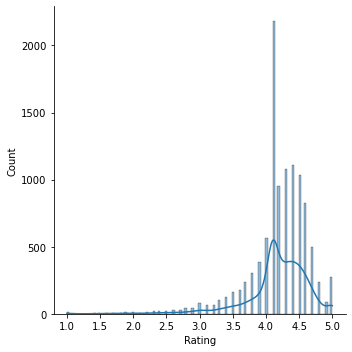

In [27]:
sn.displot(dataset['Rating'], kde = True)

#### We can see that there are very less app with low rating
#### Another conclusion is there are huge number of apps with rating between 4 to 5

### App with Maximum Size

In [28]:
print("App with Maximum Size :-> ", dataset.loc[dataset['Size'].idxmax()]['App'])
print("Maximum Size :-> ", dataset.loc[dataset['Size'].idxmax()]['Size'])

App with Maximum Size :->  Post Bank
Maximum Size :->  100000.0


### App with Maximum Reviews

In [29]:
print("App with Maximum Reviews :-> ",dataset.loc[dataset['Reviews'].idxmax()]['App'])
print("Category of App :-> ", dataset.loc[dataset['Reviews'].idxmax()]['Category'])

App with Maximum Reviews :->  Facebook
Category of App :->  SOCIAL


### App with Maximum Installs

In [30]:
print("App with Maximum Installs :-> ",dataset.loc[dataset['Installs'].idxmax()]['App'])
print("Category of App :-> ", dataset.loc[dataset['Installs'].idxmax()]['Category'])

App with Maximum Installs :->  Facebook
Category of App :->  SOCIAL


### Popular Categories

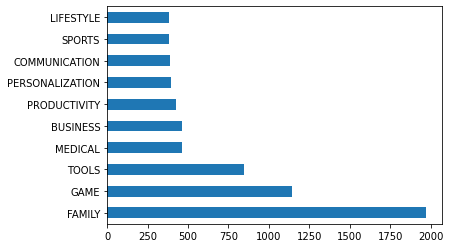

In [31]:
dataset['Category'].value_counts()[:10].plot(kind='barh')

#### The Maximum app are under FAMILY category 

## Model Selection

In [32]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10159,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500967,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5087510,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50215644,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100967,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [33]:
dataset.drop(['Last Updated','Current Ver','Android Ver', 'App','Genres'], axis=1, inplace=True)

### Geting the dummy of categorical variables

In [34]:
dummy_category = pd.get_dummies(dataset['Category'], drop_first=True)
dummy_type = pd.get_dummies(dataset['Type'], drop_first=True)
dummy_content = pd.get_dummies(dataset['Content Rating'], drop_first=True)
dataset.drop(['Category','Type','Content Rating'], axis=1, inplace=True)

In [35]:
dataset = pd.concat([dataset, dummy_category, dummy_content, dummy_type], axis=1)

### Split Data into train and target data

In [36]:
train = dataset.drop('Rating', axis=1)
target = dataset['Rating']

### Convert all the features into same scale

In [37]:
from sklearn.preprocessing import StandardScaler
sc_scale = StandardScaler()
train = sc_scale.fit_transform(train)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state = 1)

## Using Support Vector Regression Model

In [39]:
from sklearn.svm import SVR
sv_r = SVR()

In [40]:
sv_r.fit(X_train, y_train)

SVR()

In [41]:
from sklearn.metrics import mean_squared_error
print("RMSE of Support Vector Regressor :-> ", np.sqrt(mean_squared_error(y_test, sv_r.predict(X_test))))

RMSE of Support Vector Regressor :->  0.4696943086988868


## Using Random Forest Regression

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf_regress = RandomForestRegressor()

In [43]:
rf_regress.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
print("RMSE of Random Forest Model :-> ", np.sqrt(mean_squared_error(y_test, rf_regress.predict(X_test))))

RMSE of Random Forest Model :->  0.4557446066746716


## Using XG Boost with Hyper Parameter Optimization

In [45]:
import xgboost
xgb_regress = xgboost.XGBRegressor()

In [46]:
xgb_regress.fit(X_train, y_train)
print("RMSE of XG Boost Model :-> ", np.sqrt(mean_squared_error(y_test, xgb_regress.predict(X_test))))

RMSE of XG Boost Model :->  0.45448094185775567


### Hyper Parameter Optimization

In [47]:
hyper_param = {'n_estimators': [100,300,500,700,1300],
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[3,5,8,10,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.1,0.3,0.5],
    'colsample_bytree':[0.3,0.5,0.7],
    }

In [48]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_regress,param_distributions=hyper_param,n_jobs=-1, scoring="neg_mean_absolute_error",cv=5, verbose=3,n_iter=50, random_state=10)

In [49]:
random_search.fit(X_train, y_train)

In [50]:
print("RMSE of XG Boost with Optimization Model :-> ", np.sqrt(mean_squared_error(y_test, random_search.predict(X_test))))

RMSE of XG Boost with Optimization Model :->  0.4406854986473042
